Importujemy niezbędne biblioteki

In [1]:
import pygad
import numpy as np
from time import time

Analogicznie do zadania z poprzedniego filmu, zadajemy funkcję fitnessu, dopasowaną do problemu:

In [3]:
numbers = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 46, 51, 60, 70, 79, 80]
original_sum = np.sum(numbers)
print(f"Suma wszystkich liczb: {original_sum}")

Suma wszystkich liczb: 550


In [4]:
def fitness_function(genetic_algorithm_instance, solution, solution_idx):
    """Gen '1' w chromosomie oznacza wybór liczby z listy, a '0' jej pominięcie.
    Np.: Oryginalna lista [1, 2, 3] i chromosom [0, 1, 1], tzn. że wybieramy [2, 3]
    """
    chosen_numbers = []
    index = 0
    
    for item in solution:
        if int(item) == 1:
            chosen_numbers.append(numbers[index])
        index += 1
    
    sum_of_chosen_numbers = np.sum(chosen_numbers)
    
    fitness_value = 1 - np.abs(original_sum - 2 * sum_of_chosen_numbers) / original_sum
    
    return fitness_value

Zadajemy ustawienia algorytmu genetycznego

In [6]:
gene_space = [0, 1]
fitness_fun = fitness_function
sol_per_pop = 10
num_genes = len(numbers)
num_parents_mating = 5
num_generation = 30
keep_parents = 2
parent_selection_type = 'tournament'
crossover_type = 'single_point'
mutation_type = 'random'
mutation_percent_genes = 8

Tworzymy puste listy na historię: 
1. Wartości funkcji fitnessu
2. Wyników
3. Liczby generacji do uzyskania rozwiązania
4. Czasu trwania algorytmu

In [7]:
fitness_list = []
times = []
output_list = []
generations_num = []

Uruchamiamy algorytm dziesięciokrotnie:

In [9]:
for _ in range(10):
    """Mierzymy czas na start"""
    start = time()
    
    """Inicjujemy algorytm genetyczny"""
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generation,
        fitness_func=fitness_fun,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        stop_criteria='reach_1',
        keep_parents=keep_parents,
        num_parents_mating=num_parents_mating
    )
    
    """Uruchamiamy i ponownie mierzymy czas"""
    ga_instance.run()
    end = time()
    times.append(end - start)
    
    """Zapisujemy parametry rozwiązań"""
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print(f"Chromosome which is the best solution: {solution}")
    print(f"Fitness value of the solution: {solution_fitness}")
    
    fitness_list.append(np.round(solution_fitness, 3))
    prediction = np.sum(numbers * solution)
    output_list.append(100 * prediction / original_sum)

Chromosome which is the best solution: [1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.]
Fitness value of the solution: 0.9963636363636363
Chromosome which is the best solution: [1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
Fitness value of the solution: 1.0
Chromosome which is the best solution: [1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.]
Fitness value of the solution: 0.9854545454545455
Chromosome which is the best solution: [1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
Fitness value of the solution: 0.9963636363636363
Chromosome which is the best solution: [1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.]
Fitness value of the solution: 0.9745454545454545
Chromosome which is the best solution: [0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
Fitness value of the solution: 0.9963636363636363
Chromosome which is the best solution: [1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
Fitness value of the solution: 1.0
Chromosome which is the best solution: [1. 0. 1. 1. 1. 1.

C:\Users\Jakub\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Średnie z parametrów charakteryzujących wyniki:

In [10]:
print(f"Średni czas działania algorytmu genetycznego: {np.mean(times)}")
print(f"Średnia wartość fitnessu najlepszego rozwiązania: {np.mean(fitness_list)}")
print(f"Średni wynik algorytmu genetycznego: {np.mean(output_list)}")

Średni czas działania algorytmu genetycznego: 0.00450141429901123
Średnia wartość fitnessu najlepszego rozwiązania: 0.9936999999999999
Średni wynik algorytmu genetycznego: 49.981818181818184


Historia wyników:

In [11]:
print(f"Czasy trwania: {times}")

Czasy trwania: [0.008002281188964844, 0.008001327514648438, 0.0010001659393310547, 0.0030012130737304688, 0.0019991397857666016, 0.0020017623901367188, 0.0029997825622558594, 0.006002664566040039, 0.009005069732666016, 0.0030007362365722656]


In [12]:
print(f"Wyniki: {output_list}")

Wyniki: [50.18181818181818, 50.0, 49.27272727272727, 49.81818181818182, 51.27272727272727, 49.81818181818182, 50.0, 49.63636363636363, 50.0, 49.81818181818182]


In [13]:
print(f"Najlepsze wartości fitnessu: {fitness_list}")

Najlepsze wartości fitnessu: [0.996, 1.0, 0.985, 0.996, 0.975, 0.996, 1.0, 0.993, 1.0, 0.996]


Tworzymy pojedynczy wykres wart. fit. Vs liczba pokoleń:

In [14]:
import matplotlib.pyplot as plt

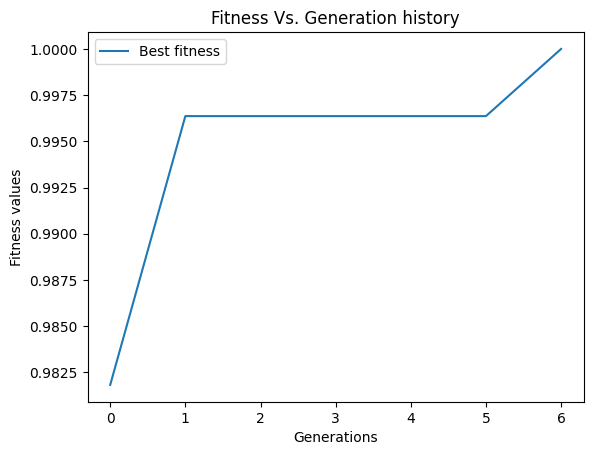

In [15]:
plt.clf()  # czyszczenie historii wykresów
plt.plot(ga_instance.best_solutions_fitness, label='Best fitness')
plt.xlabel('Generations')
plt.ylabel('Fitness values')
plt.title('Fitness Vs. Generation history')
plt.legend()
plt.show()

Łączymy wykresy z pętlą:

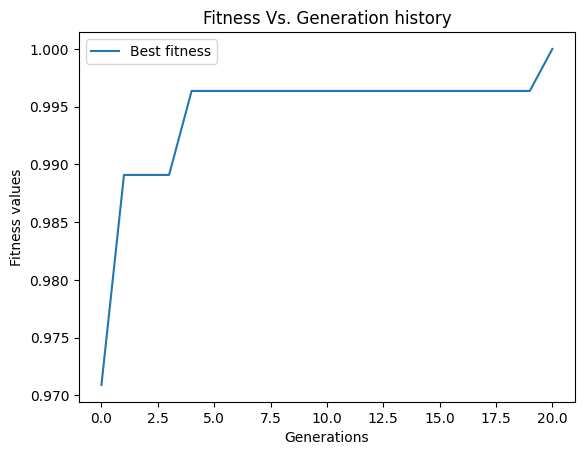

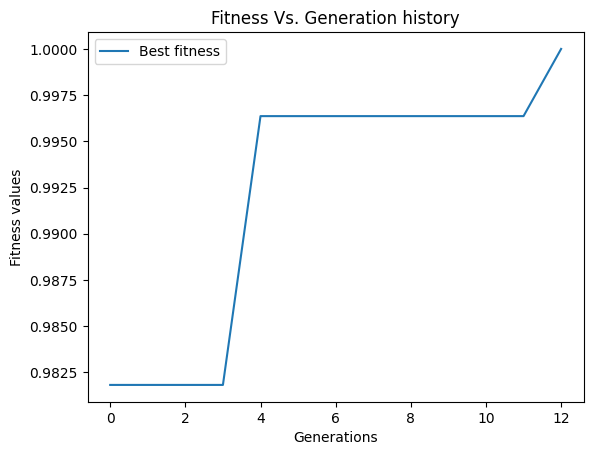

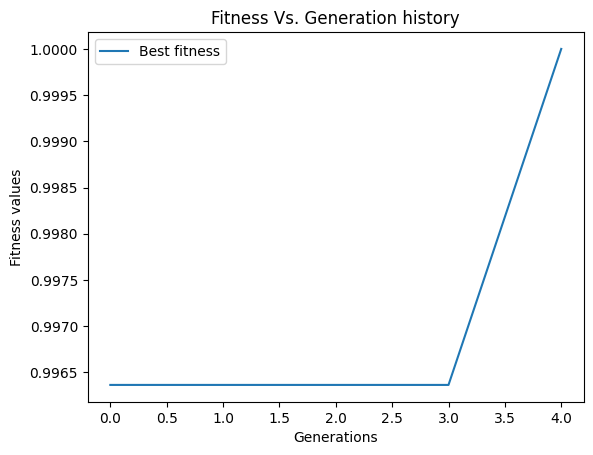

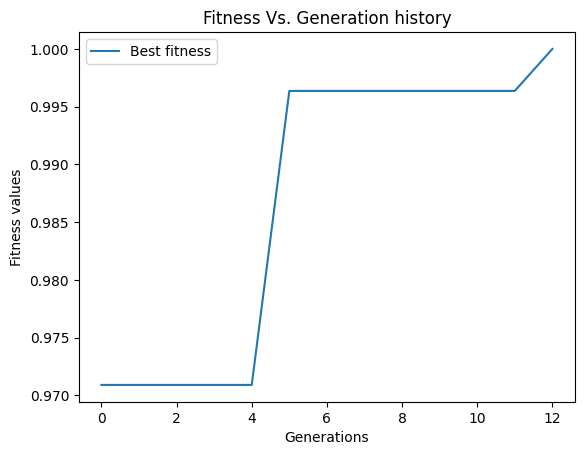

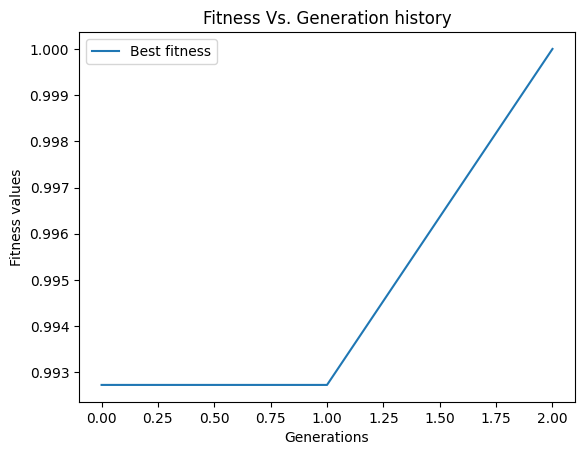

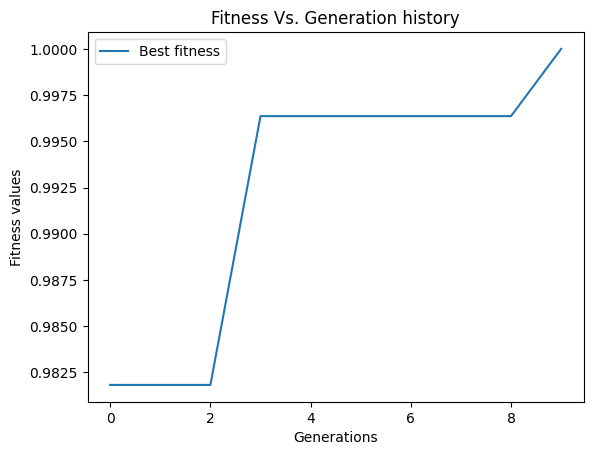

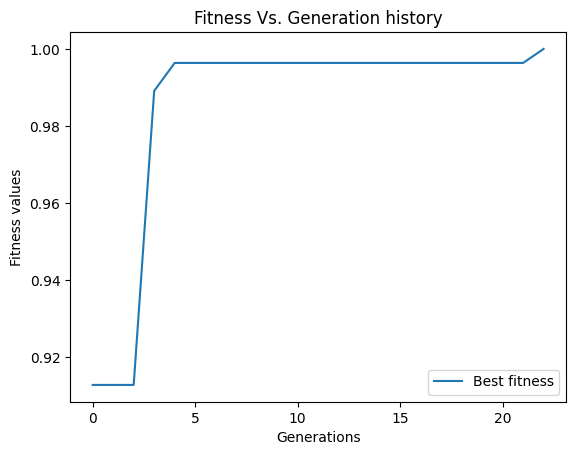

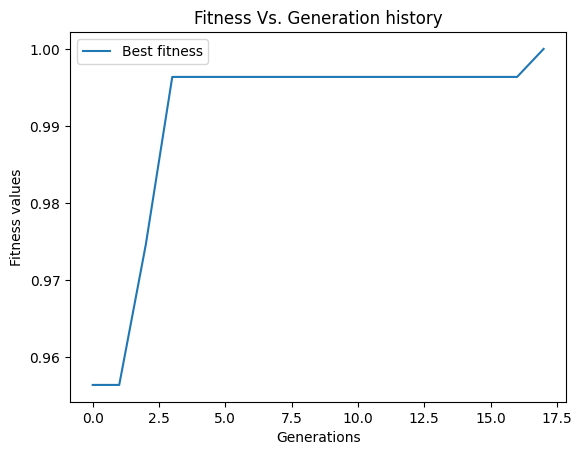

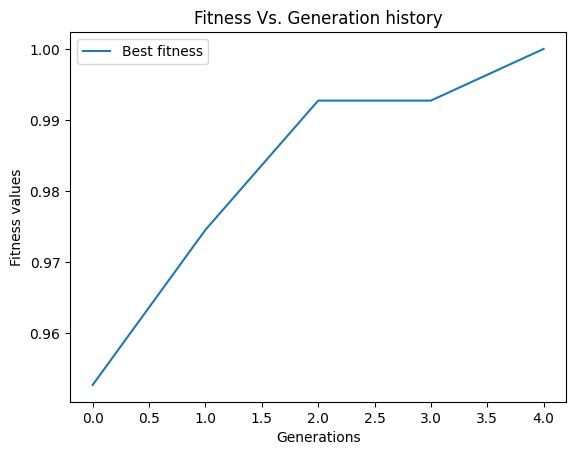

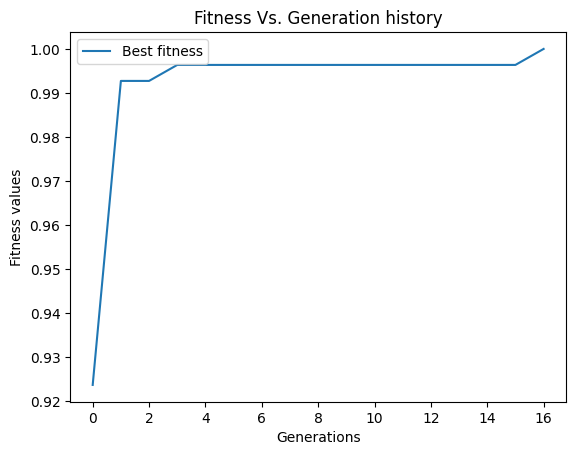

In [16]:
for _ in range(10):   
    """Inicjujemy algorytm genetyczny"""
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generation,
        fitness_func=fitness_fun,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        stop_criteria='reach_1',
        keep_parents=keep_parents,
        num_parents_mating=num_parents_mating
    )
    
    """Uruchamiamy"""
    ga_instance.run()

    """Tworzymy wykres"""
    plt.clf()  # czyszczenie historii wykresów
    plt.plot(ga_instance.best_solutions_fitness, label='Best fitness')
    plt.xlabel('Generations')
    plt.ylabel('Fitness values')
    plt.title('Fitness Vs. Generation history')
    plt.legend()
    plt.show()